In [31]:
import pandas as pd
df = pd.read_pickle("churn_prediction_v3.pkl")
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


In [32]:
df.columns

Index(['vintage', 'age', 'gender', 'dependents', 'occupation', 'city',
       'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15929 entries, 0 to 15928
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         15929 non-null  int64   
 1   age                             15929 non-null  int64   
 2   gender                          15929 non-null  category
 3   dependents                      15929 non-null  int64   
 4   occupation                      15929 non-null  category
 5   city                            15929 non-null  category
 6   customer_nw_category            15929 non-null  category
 7   branch_code                     15929 non-null  category
 8   current_balance                 15929 non-null  float64 
 9   previous_month_end_balance      15929 non-null  float64 
 10  average_monthly_balance_prevQ   15929 non-null  float64 
 11  average_monthly_balance_prevQ2  15929 non-null  float64 
 12  current_month_cred

# Central Limit Theorem

### Central Limit Theorem in the banking domain:

### ATM Withdrawals:
Suppose you are analyzing the daily ATM withdrawals made by bank customers. The withdrawals are independent and identically distributed (i.i.d) random variables. By applying the Central Limit Theorem, you can approximate the distribution of the total daily withdrawals as a normal distribution, regardless of the underlying distribution of individual withdrawals. This approximation allows you to make statistical inferences about the total withdrawals, such as estimating the average withdrawal amount or calculating confidence intervals.

### Loan Approval Time:
Consider the loan approval time for a bank, which represents the time taken to process and approve loan applications. The loan approval time may vary for each application and could follow a different distribution. By collecting a sufficiently large sample of loan approval times, you can apply the Central Limit Theorem to approximate the distribution of the sample mean. This approximation enables you to make inferences about the population mean loan approval time and estimate quantities such as confidence intervals or probabilities of loan approvals within certain timeframes.

In [117]:
# Assumptions for CLT
# 1. The sampels are Independent & Identically Distributed (IID) samples
#       (also sampling with replacement will ensure the samples are independent)
# 2. The sample distributions are similar to the population distribution
# 3. The sample size is large enough (n>30)

# then the CLT for the sample means implies that:
# 1. The distributions of the sample means (Sampling Distribution) WILL ALWAYS be 
#     a NORMAL/Gaussian distribution, IRRESPECTIVe of the original population distrib.

# 2. The mean of the smaple means (i.e the mean of the Sampling Distribution) is 
#      approx equal to the population mean

# 3. The stand dev of the Sampling Distribution is equal to popln_std_dev/sqrt(n), n being the sample size.
#     popln_std_dev/sqrt(n) >>> also called as the Standard Error (SE) in the estimation
#     of the population mean from the sample means.



<Axes: ylabel='Density'>

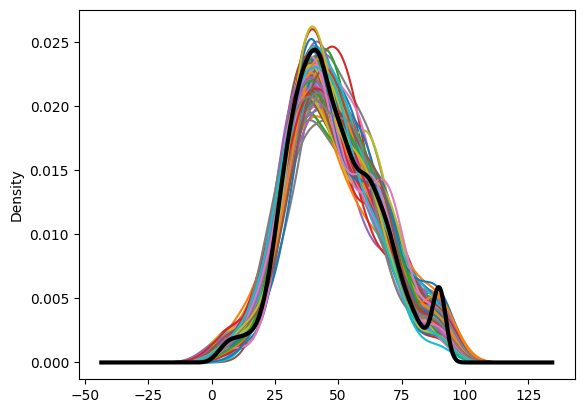

In [127]:
# Use the df['age'] to validate the CLT
# Draw 100 samples, each of 200 sample size (n = 200)

sample_means = []
for i in range(100):  # draw one sample in each iteration.... 100 iterations gives 100 samples
    sample = df['age'].sample(200)  # each sample has 200 age values
    sample_means.append(sample.mean())
    sample.plot.kde()  # plotting the sample distributions
    
# len(sample_means)
df['age'].plot.kde(lw=3, color='k')   # population distribution

In [129]:
sample_means = np.array(sample_means)
sample_means.mean()  # mean of the sample means

48.24639999999999

In [131]:
 # this is the ACTUAL population mean

48.17320610207797

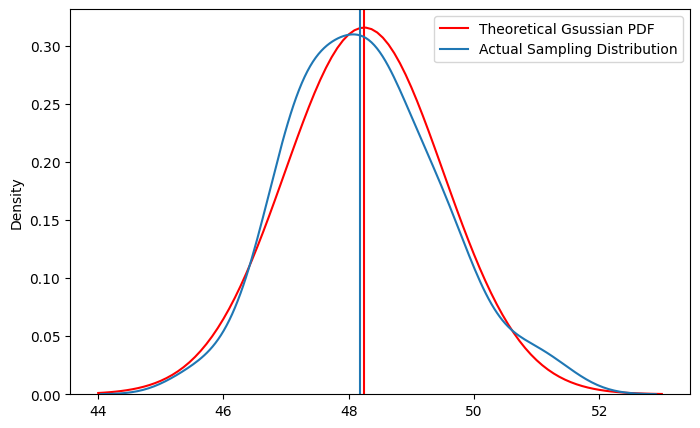

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

SE = df['age'].std()/(np.sqrt(200))
x_values = np.linspace(44, 53, 100)
pdf_values = norm.pdf(x_values, loc=sample_means.mean(), scale=SE)

# Plot the Normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, 'r-', label='Theoretical Gsussian PDF')
plt.axvline(sample_means.mean() , color='r')

sns.kdeplot(data=sample_means, label='Actual Sampling Distribution')
plt.axvline(df['age'].mean())
plt.legend()

## Applications of the Central Limit Theorem (CLT):

### Hypothesis Testing: 
The CLT is often utilized in hypothesis testing, where the underlying population distribution may not be known or may not follow a normal distribution. By applying the CLT, we can use the normal distribution as an approximation to calculate critical values, p-values, and confidence intervals, making hypothesis testing more reliable and applicable to a wide range of scenarios.

### Estimation: 
The CLT is crucial for estimating population parameters such as means or proportions, by using the sample mean or sample proportion as an unbiased estimator of the population mean or population proportion, respectively. 

### Sample Size Determination: 
The CLT plays a vital role in determining the appropriate sample size for statistical studies. By understanding the properties of the CLT, researchers can estimate the necessary sample size to achieve a desired level of precision and confidence in their statistical analysis.

### Quality Control: 
In industries such as manufacturing, the CLT is employed to monitor and control the quality of products or processes. By collecting samples and measuring various quality characteristics, the CLT allows for the use of control charts and statistical process control methods to identify and address deviations from desired quality levels.

### Surveys and Polling: 
When conducting surveys or opinion polls, the CLT is applied to ensure accurate estimation of population parameters. By following proper sampling techniques and considering the CLT, researchers can determine the required sample size and apply statistical methods to reduce sampling bias and estimate the true population values with reasonable precision.

### Regression Analysis: 
In regression analysis, the CLT is utilized to assess the statistical significance of regression coefficients and to construct confidence intervals around those coefficients. The CLT enables the use of t-tests and hypothesis tests to determine if the estimated coefficients are significantly different from zero.

## Sample Size Determination: 
You are a data analyst working for a bank, and you want to determine the appropriate sample size to estimate the proportion of customers who churn with a desired level of precision and confidence. You aim to use the Central Limit Theorem to guide your sample size determination. Let's assume you want to estimate the proportion of churned customers with a margin of error of ±2%, with a 95% confidence level.

In [18]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


In [24]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Estimate the population proportion of churned customers
p = df['churn'].astype('int64').mean()

# Set the desired level of precision and confidence
precision = 0.02
confidence_level = 0.95

In [25]:
# Calculate the critical value corresponding to the desired confidence level
z = norm.ppf((1 + confidence_level) / 2)
z

1.959963984540054

In [26]:
# Calculate the necessary sample size
sample_size = (z**2 * p * (1 - p)) / precision**2

# Round up to the nearest integer
sample_size = np.ceil(sample_size)

print(f"The required sample size to estimate the proportion of churned customers is: {int(sample_size)}")

The required sample size to estimate the proportion of churned customers is: 1464


By following this approach, you can determine an appropriate sample size that allows you to estimate the proportion of churned customers with a desired level of precision and confidence, leveraging the properties of the Central Limit Theorem.

### Example 2: 
Now you want to estimate the average age of churned customers with a margin of error of ±2 years, and you want a 95% confidence level. Use the Central Limit Theorem to determine the required sample size for your study.

n = (Z^2 * σ^2) / E^2

where n is the required sample size, Z is the critical value corresponding to the desired confidence level (e.g., for a 95% confidence level, Z = 1.96), σ is the estimated population standard deviation (if available), and E is the desired margin of error.

In [28]:
# Subset the dataset for churned customers
churned_df = df[df['churn'] == 1]

# Estimate the population mean of age for churned customers
population_mean = churned_df['age'].mean()

In [29]:
# Set the desired level of precision and confidence
precision = 2
confidence_level = 0.95

# Calculate the critical value corresponding to the desired confidence level
z = norm.ppf((1 + confidence_level) / 2)
z

1.959963984540054

In [30]:
# Estimate the population standard deviation (σ) if available
population_std = churned_df['age'].std()

# Calculate the necessary sample size
sample_size = (z**2 * (population_std**2)) / precision**2

# Round up to the nearest integer
sample_size = np.ceil(sample_size)

print(f"The required sample size to estimate the average age of churned customers is: {int(sample_size)}")

The required sample size to estimate the average age of churned customers is: 283
